In [1]:
# Import the datetime library for reliability
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

# Start days - First of each month
start_date = datetime(2020,11,1) #(y,m,d,h,m)
dec_start_date = datetime(2020,12,1)
jan_start_date = datetime(2021,1,1)

# End days - Last of each month
end_date = start_date + relativedelta(day=+31) 
dec_end_date = dec_start_date + relativedelta(day=+31)
jan_end_date = jan_start_date + relativedelta(day=+31) 

# double checking
print(start_date, end_date)

2020-11-01 00:00:00 2020-11-30 00:00:00


In [2]:
from google.cloud import bigquery
from google.oauth2 import service_account
import pandas as pd
import matplotlib.pyplot as plt

credentials = service_account.Credentials.from_service_account_file('personal-projects-413519-0477ec14d32f.json')

# The project id to which the service account has access
project_id = 'personal-projects-413519'

# Establish a connection to the client
client = bigquery.Client(credentials=credentials, project=project_id)


#November date range
dates = pd.date_range(start_date, end_date)

#Define variables
project = "bigquery-public-data"
dataset = "ga4_obfuscated_sample_ecommerce"
table = 'events'
data = {}

#Create November df for revenue

nov_country_df = pd.DataFrame(data)

#Creating def
def sql(client, query_string):
    
    query = client.query(query_string)

    nov_country_df = query.to_dataframe()
    
    return nov_country_df


#For loop to get info for multiple dates

for date in dates:
    
    #Put dates into strings
    date = date.strftime('%Y%m%d')
    
    query_string = f"""

    SELECT
      COALESCE(SUM(items.item_revenue_in_usd), 0) AS revenue
    FROM
      `{project}.{dataset}.{table}_{date}`,
      UNNEST(items) AS items
      
    """
    
    data = sql(client, query_string)
    
    #Concatenate the info into dataframe for each date
    
    nov_country_df = pd.concat([nov_country_df, data], axis=0)

#Reset the index
nov_country_df.reset_index(inplace=True,drop=True)
nov_country_df.head(30)


,revenue
0,770.0
1,4798.0
2,3320.0
3,2197.0
4,1792.0
5,3443.0
6,2533.0
7,3759.0
8,2161.0
9,4046.0


In [8]:

#December date range
dates = pd.date_range(dec_start_date, dec_end_date)

#Define variables
project = "bigquery-public-data"
dataset = "ga4_obfuscated_sample_ecommerce"
table = 'events'
data = {}

#Create December df for revenue

dec_country_df = pd.DataFrame(data)

#Creating def
def sql(client, query_string):
    
    query = client.query(query_string)

    dec_country_df = query.to_dataframe()
    
    return dec_country_df


#For loop to get info for multiple dates

for date in dates:
    
    #Put dates into strings
    date = date.strftime('%Y%m%d')
    
    query_string = f"""

    SELECT
      COALESCE(SUM(items.item_revenue_in_usd), 0) AS revenue
    FROM
      `{project}.{dataset}.{table}_{date}`,
      UNNEST(items) AS items
      
    """
    
    data = sql(client, query_string)
    
    #Concatenate the info into dataframe for each date
    
    dec_country_df = pd.concat([dec_country_df, data], axis=0)

#Reset the index
dec_country_df.reset_index(inplace=True,drop=True)
dec_country_df.head(30)


,revenue
0,6260.0
1,5202.0
2,4313.0
3,6454.0
4,6398.0
5,2328.0
6,8466.0
7,8691.0
8,10857.0
9,10760.0


In [55]:

#January date range
dates = pd.date_range(jan_start_date, jan_end_date)

#Define variables
project = "bigquery-public-data"
dataset = "ga4_obfuscated_sample_ecommerce"
table = 'events'
data = {}

#Create January df for item revenue

jan_ecom_rev_df = pd.DataFrame(data)

#Creating def
def sql(client, query_string):
    
    query = client.query(query_string)

    jan_ecom_rev_df = query.to_dataframe()
    
    return jan_ecom_rev_df


#For loop to get info for multiple dates

for date in dates:
    
    #Put dates into strings
    date = date.strftime('%Y%m%d')
    
    query_string = f"""

    SELECT
      COALESCE(SUM(ecommerce.purchase_revenue_in_usd), 0) AS ecommerce
    FROM
      `{project}.{dataset}.{table}_{date}`
    WHERE geo.country = 'United States'
    
    """
    
    data = sql(client, query_string)
    
    #Concatenate the info into dataframe for each date
    
    jan_ecom_rev_df = pd.concat([jan_ecom_rev_df, data], axis=0)

#Reset the index
jan_ecom_rev_df.reset_index(inplace=True,drop=True)
jan_ecom_rev_df.head(30)



,ecommerce
0,381.0
1,685.0
2,124.0
3,458.0
4,427.0
5,379.0
6,767.0
7,677.0
8,659.0
9,567.0


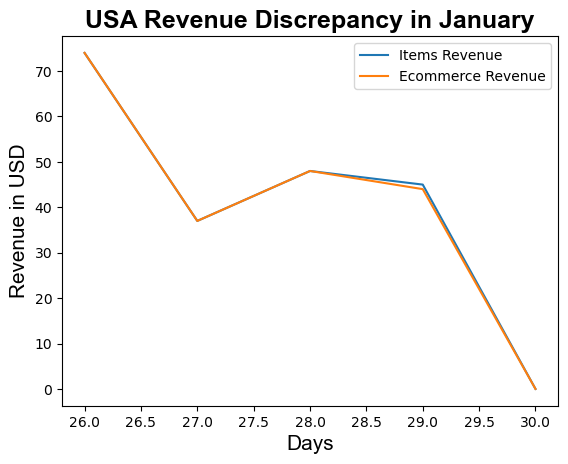

In [58]:

#January date range
dates = pd.date_range(jan_start_date, jan_end_date)

#Define variables
project = "bigquery-public-data"
dataset = "ga4_obfuscated_sample_ecommerce"
table = 'events'
data = {}

#Create January df for item revenue

jan_item_rev_df = pd.DataFrame(data)

#Creating def
def sql(client, query_string):
    
    query = client.query(query_string)

    jan_item_rev_df = query.to_dataframe()
    
    return jan_item_rev_df


#For loop to get info for multiple dates

for date in dates:
    
    #Put dates into strings
    date = date.strftime('%Y%m%d')
    
    query_string = f"""

    SELECT
      COALESCE(SUM(items.item_revenue_in_usd), 0) AS revenue
    FROM
      `{project}.{dataset}.{table}_{date}`,
      UNNEST(items) AS items
    WHERE geo.country = 'United States'
      
    """
    
    data = sql(client, query_string)
    
    #Concatenate the info into dataframe for each date
    
    jan_item_rev_df = pd.concat([jan_item_rev_df, data], axis=0)

#Reset the index
jan_item_rev_df.reset_index(inplace=True,drop=True)
jan_item_rev_df.head(30)

#Extract and name columns from dataframe

items = jan_item_rev_df['revenue'].tail(5)
ecommerce = jan_ecom_rev_df['ecommerce'].tail(5)

plt.plot(items, label = 'Items Revenue')
plt.plot(ecommerce, label = 'Ecommerce Revenue')
plt.title('USA Revenue Discrepancy in January', fontdict={'fontsize': 18, 'fontweight': 'bold', 'color': 'black', 'family': 'Arial'})
plt.ylabel('Revenue in USD', fontdict={'fontsize': 15, 'color': 'black', 'family': 'Arial'})
plt.xlabel('Days', fontdict={'fontsize': 15, 'color': 'black', 'family': 'Arial'})
plt.legend()
plt.show()


In [5]:
#November Grouping

print(nov_country_df.sum())


#December grouping

print(dec_country_df.sum())


#January grouping

print(jan_country_df.sum())


revenue    144313.0
dtype: float64
revenue    160498.0
dtype: float64
revenue    57299.0
dtype: float64
